###Diabetes Prediction using PySpark Data Preprocessing and Logistic Regression Model

In [8]:
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from pyspark.sql import SparkSession

In [10]:
spark=SparkSession.builder.appName('Dataframe').getOrCreate()

In [11]:
spark

In [12]:
## read the dataset
df_pyspark=spark.read.option('header','true').csv('/content/drive/MyDrive/a_diabetes.csv',inferSchema=True)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df_pyspark.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [15]:
df_pyspark.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [16]:
print("Data has \033[1m", df_pyspark.count(), "\033[0m rows and \033[1m", len(df_pyspark.columns), "\033[0m columns\n\n")
print("Column Name \t\t Data Type\n")
print(df_pyspark.dtypes)


Data has  768  rows and  9  columns


Column Name 		 Data Type

[('Pregnancies', 'int'), ('Glucose', 'int'), ('BloodPressure', 'int'), ('SkinThickness', 'int'), ('Insulin', 'int'), ('BMI', 'double'), ('DiabetesPedigreeFunction', 'double'), ('Age', 'int'), ('Outcome', 'int')]


In [17]:
df_pyspark.select(['Glucose','BloodPressure']).show()

+-------+-------------+
|Glucose|BloodPressure|
+-------+-------------+
|    148|           72|
|     85|           66|
|    183|           64|
|     89|           66|
|    137|           40|
|    116|           74|
|     78|           50|
|    115|            0|
|    197|           70|
|    125|           96|
|    110|           92|
|    168|           74|
|    139|           80|
|    189|           60|
|    166|           72|
|    100|            0|
|    118|           84|
|    107|           74|
|    103|           30|
|    115|           70|
+-------+-------------+
only showing top 20 rows



In [18]:
df_pyspark.select(['Glucose','BloodPressure','SkinThickness','Insulin']).show()

+-------+-------------+-------------+-------+
|Glucose|BloodPressure|SkinThickness|Insulin|
+-------+-------------+-------------+-------+
|    148|           72|           35|      0|
|     85|           66|           29|      0|
|    183|           64|            0|      0|
|     89|           66|           23|     94|
|    137|           40|           35|    168|
|    116|           74|            0|      0|
|     78|           50|           32|     88|
|    115|            0|            0|      0|
|    197|           70|           45|    543|
|    125|           96|            0|      0|
|    110|           92|            0|      0|
|    168|           74|            0|      0|
|    139|           80|            0|      0|
|    189|           60|           23|    846|
|    166|           72|           19|    175|
|    100|            0|            0|      0|
|    118|           84|           47|    230|
|    107|           74|            0|      0|
|    103|           30|           

In [19]:
df_pyspark.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [20]:
### Adding Columns in data frame
df_pyspark=df_pyspark.withColumn('Glucose + 10 units',df_pyspark['Glucose'])

In [21]:
df_pyspark.show() # You can see another column with 10 gram extra Glucose record

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|Glucose + 10 units|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+------------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|               148|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|                85|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|               183|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|                89|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|               137|
|          5|    116|           74|            0

In [22]:
#Now we can also drop any of column let's say Glucose+10 column drop

df_pyspark=df_pyspark.drop('Glucose + 10 units')
df_pyspark.show() # Now see Glucose + 10 units is dropped from the dataframe

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [23]:
import numpy as np
df_pyspark_model = df_pyspark.na.fill(0, subset=df_pyspark.columns).replace(0, None, subset=df_pyspark.columns)


In [24]:
df_pyspark_model.show() # We can see now thta 0 is replaced by 'null' values


+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|   null|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|   null|26.6|                   0.351| 31|   null|
|          8|    183|           64|         null|   null|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|   null|
|       null|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|         null|   null|25.6|                   0.201| 30|   null|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [25]:
df_pyspark_model1=df_pyspark_model.na.drop().show() # Now we can see all null values are dropped in the pyspark dataframe

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|
|          2|    197|           70|           45|    543|30.5|                   0.158| 53|      1|
|          1|    189|           60|           23|    846|30.1|                   0.398| 59|      1|
|          5|    166|           72|           19|    175|25.8|                   0.587| 51|      1|
|          1|    115|           70|           30|     96|34.6|                   0.529| 32|      1|
|         11|    143|           94|           33|    146|36.6|                   0.254| 51|      1|
|         10|    125|           70|           26|    115|31.1|                   0.205| 41|      1|


In [26]:
#threshold setting
df_pyspark.na.drop(how="any",thresh=3).show() #thresh=3: This parameter sets a threshold value for dropping rows.
# In this case, it drops rows only if they have fewer than 3 non-null values. Rows with 3 or more non-null values 
#are retained.

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [27]:
df_pyspark=df_pyspark.na.drop().show() # again dropping as we don't need threshold, all null values are dropped in the pyspark dataframe

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


##DataFrames Filter Operations
##Filter Operation


In [28]:
df_pyspark1=spark.read.csv('/content/drive/MyDrive/a_diabetes.csv',header=True,inferSchema=True)

In [29]:
df_pyspark1.printSchema()
df_pyspark1.show()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          

In [30]:
# Applying the filter that is about BloodPressure above 100
df_pyspark1.filter("BloodPressure>=100").show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          9|    171|          110|           24|    240|45.4|                   0.721| 54|      1|
|          5|    137|          108|            0|      0|48.8|                   0.227| 37|      1|
|          1|     96|          122|            0|      0|22.4|                   0.207| 27|      0|
|          0|    129|          110|           46|    130|67.1|                   0.319| 26|      1|
|          5|    162|          104|            0|      0|37.7|                   0.151| 52|      1|
|          5|    103|          108|           37|      0|39.2|                   0.305| 65|      0|
|          1|    133|          102|           28|    140|32.8|                   0.234| 45|      1|


In [31]:
df_pyspark1.filter("BloodPressure>=100").select(['Glucose','BloodPressure']).show()

+-------+-------------+
|Glucose|BloodPressure|
+-------+-------------+
|    171|          110|
|    137|          108|
|     96|          122|
|    129|          110|
|    162|          104|
|    103|          108|
|    133|          102|
|     93|          100|
|    105|          100|
|    189|          104|
|    189|          110|
|    127|          106|
|    167|          106|
|     68|          106|
|    123|          100|
|    158|          114|
+-------+-------------+



In [32]:
df_pyspark1.filter((df_pyspark1['Insulin']<=200) | 
                  (df_pyspark1['Insulin']>=250)).show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


##Pyspark GroupBy And Aggregate Functions

In [33]:
spark=SparkSession.builder.appName('Agg').getOrCreate()

In [34]:
spark

In [35]:
df_pyspark=spark.read.csv('/content/drive/MyDrive/a_diabetes.csv',header=True,inferSchema=True)

In [36]:
df_pyspark.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [37]:
df_pyspark.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [38]:
df_pyspark.groupBy('outcome').sum().show()

+-------+----------------+------------+------------------+------------------+------------+-----------------+-----------------------------+--------+------------+
|outcome|sum(Pregnancies)|sum(Glucose)|sum(BloodPressure)|sum(SkinThickness)|sum(Insulin)|         sum(BMI)|sum(DiabetesPedigreeFunction)|sum(Age)|sum(Outcome)|
+-------+----------------+------------+------------------+------------------+------------+-----------------+-----------------------------+--------+------------+
|      1|            1304|       37857|             18981|              5940|       26890|9418.199999999986|                      147.534|    9934|         268|
|      0|            1649|       54990|             34092|              9832|       34396|15152.09999999998|           214.86700000000008|   15595|           0|
+-------+----------------+------------+------------------+------------------+------------+-----------------+-----------------------------+--------+------------+



In [39]:
df_pyspark.groupBy('Glucose').avg().show()

+-------+------------------+------------+------------------+------------------+------------------+------------------+-----------------------------+------------------+-------------------+
|Glucose|  avg(Pregnancies)|avg(Glucose)|avg(BloodPressure)|avg(SkinThickness)|      avg(Insulin)|          avg(BMI)|avg(DiabetesPedigreeFunction)|          avg(Age)|       avg(Outcome)|
+-------+------------------+------------+------------------+------------------+------------------+------------------+-----------------------------+------------------+-------------------+
|    148|              5.75|       148.0|              70.5|             33.75|            138.75|             33.65|                       0.5085|              38.0|               0.75|
|     85| 5.285714285714286|        85.0| 67.14285714285714|13.285714285714286|               7.0|29.814285714285717|           0.5184285714285715|33.857142857142854|0.14285714285714285|
|    137|              2.75|       137.0|            75.625|     

In [40]:
df_pyspark.groupBy('Insulin').sum().show()

+-------+----------------+------------+------------------+------------------+------------+------------------+-----------------------------+--------+------------+
|Insulin|sum(Pregnancies)|sum(Glucose)|sum(BloodPressure)|sum(SkinThickness)|sum(Insulin)|          sum(BMI)|sum(DiabetesPedigreeFunction)|sum(Age)|sum(Outcome)|
+-------+----------------+------------+------------------+------------------+------------+------------------+-----------------------------+--------+------------+
|    148|               0|         243|               138|                51|         296|              64.2|                        0.748|      43|           0|
|    540|               2|         155|                52|                27|         540|              38.7|                         0.24|      25|           1|
|    392|               7|         187|                50|                33|         392|              33.9|                        0.826|      34|           1|
|     85|               6|  

In [41]:
df_pyspark_model1=df_pyspark_model.na.drop().show() ## With no Null values for Model training

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|
|          2|    197|           70|           45|    543|30.5|                   0.158| 53|      1|
|          1|    189|           60|           23|    846|30.1|                   0.398| 59|      1|
|          5|    166|           72|           19|    175|25.8|                   0.587| 51|      1|
|          1|    115|           70|           30|     96|34.6|                   0.529| 32|      1|
|         11|    143|           94|           33|    146|36.6|                   0.254| 51|      1|
|         10|    125|           70|           26|    115|31.1|                   0.205| 41|      1|


#Model
##Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [43]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

# Read the CSV file into a DataFrame
df_pyspark = spark.read.csv("/content/drive/MyDrive/a_diabetes.csv", header=True, inferSchema=True)

# Show the DataFrame
df_pyspark.show()


+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


###Removing 0 values from all columns before training model

In [44]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.getOrCreate()

# Assuming you have a DataFrame named df_pyspark

# Filter out rows with 0 values in any column
df_pyspark_filtered = df_pyspark.filter((col("Pregnancies") != 0) &
                                        (col("Glucose") != 0) &
                                        (col("BloodPressure") != 0) &
                                        (col("SkinThickness") != 0) &
                                        (col("Insulin") != 0) &
                                        (col("BMI") != 0) &
                                        (col("DiabetesPedigreeFunction") != 0) &
                                        (col("Age") != 0))

# Show the filtered DataFrame
df_pyspark_filtered.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|
|          2|    197|           70|           45|    543|30.5|                   0.158| 53|      1|
|          1|    189|           60|           23|    846|30.1|                   0.398| 59|      1|
|          5|    166|           72|           19|    175|25.8|                   0.587| 51|      1|
|          1|    103|           30|           38|     83|43.3|                   0.183| 33|      0|
|          1|    115|           70|           30|     96|34.6|                   0.529| 32|      1|


In [45]:
X = df_pyspark_filtered.drop('Outcome')  # predictor variables
y = df_pyspark_filtered['Outcome']  # outcome variable

##Data Transformation 

In [48]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

# Assuming you have a DataFrame named df_pyspark_filtered

# Selecting the feature columns
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Creating a VectorAssembler to combine the feature columns into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Applying MinMaxScaler to normalize the features
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Creating a logistic regression model
logistic_reg = LogisticRegression(featuresCol='scaled_features', labelCol='Outcome')

# Creating a pipeline to chain the stages
pipeline = Pipeline(stages=[assembler, scaler, logistic_reg])

# Fitting the pipeline to the data
model = pipeline.fit(df_pyspark_filtered)

# Transforming the data using the trained model
transformed_data = model.transform(df_pyspark_filtered)

# Selecting the required columns for logistic regression (features and label)
selected_data = transformed_data.select('scaled_features', 'Outcome')

# Renaming the scaled features column to "features" (required for logistic regression)
selected_data = selected_data.withColumnRenamed('scaled_features', 'features')

# Displaying the transformed data
selected_data.show()


+--------------------+-------+
|            features|Outcome|
+--------------------+-------+
|[0.0,0.2340425531...|      0|
|[0.125,0.15602836...|      1|
|[0.0625,1.0,0.534...|      1|
|[0.0,0.9432624113...|      1|
|[0.25,0.780141843...|      1|
|[0.0,0.3333333333...|      0|
|[0.0,0.4184397163...|      1|
|[0.125,0.49645390...|      0|
|[0.625,0.61702127...|      1|
|[0.5625,0.4893617...|      1|
|[0.0,0.2907801418...|      0|
|[0.75,0.631205673...|      0|
|[0.125,0.72340425...|      1|
|[0.125,0.22695035...|      0|
|[0.1875,0.3333333...|      0|
|[0.1875,0.3900709...|      1|
|[0.125,0.87943262...|      0|
|[0.5,0.8156028368...|      1|
|[0.0,0.3333333333...|      0|
|[0.0,0.3191489361...|      0|
+--------------------+-------+
only showing top 20 rows



In [49]:
from pyspark.sql.functions import rand
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# Add a random column to the DataFrame for splitting
df_pyspark = df_pyspark.withColumn("rand", rand())

# Split the DataFrame into training and testing sets
train_data, test_data = df_pyspark.randomSplit([0.8, 0.2], seed=42)

# Define the features and label column names
feature_cols = df_pyspark.columns[:-1]
label_col = df_pyspark.columns[-1]

# Assemble the features into a vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Convert the label column into numerical values
label_indexer = StringIndexer(inputCol=label_col, outputCol="label")

# Create a pipeline to apply the transformations
pipeline = Pipeline(stages=[assembler, label_indexer])

# Fit and transform the training data
pipeline_model = pipeline.fit(train_data)
train_data_transformed = pipeline_model.transform(train_data)

# Fit and transform the testing data
test_data_transformed = pipeline_model.transform(test_data)

# Assign the predictor variables and the outcome variable for training and testing
X_train = train_data_transformed.select("features")
y_train = train_data_transformed.select("label")
X_test = test_data_transformed.select("features")
y_test = test_data_transformed.select("label")

# Drop the random column from the DataFrames
train_data = train_data.drop("rand")
test_data = test_data.drop("rand")


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logistic_model=LogisticRegression()


In [52]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Load the CSV data into a DataFrame
df_pyspark = spark.read.csv('/content/drive/MyDrive/a_diabetes.csv', header=True, inferSchema=True)

# Remove rows with 0 values
df_pyspark = df_pyspark.filter((df_pyspark["Glucose"] != 0) & (df_pyspark["BMI"] != 0))

# Select the predictor variables and outcome variable
columns = df_pyspark.columns
columns.remove('Outcome')
predictor_cols = columns

# Create a vector assembler to combine the features into a single vector column
assembler = VectorAssembler(inputCols=predictor_cols, outputCol='features')

# Transform the data
df_pyspark_model = assembler.transform(df_pyspark).select('features', 'Outcome')

# Split the data into training and testing sets
(train_data, test_data) = df_pyspark_model.randomSplit([0.8, 0.2], seed=42)

# Create a logistic regression model
logistic_model = LogisticRegression(labelCol='Outcome')

# Fit the model to the training data
logistic_model = logistic_model.fit(train_data)

# Make predictions on the testing data
predictions = logistic_model.transform(test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol='Outcome')
accuracy = evaluator.evaluate(predictions)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 84.86%


#Accuracy: 84.86%

## Make predictions on the test data

In [53]:
# Make predictions on the test data
predictions = logistic_model.transform(test_data)

# Select the columns of interest from the predictions
prediction_result = predictions.select('features', 'Outcome', 'prediction', 'probability')

# Show the prediction result
prediction_result.show(truncate=False)


+-------------------------------------------+-------+----------+-----------------------------------------+
|features                                   |Outcome|prediction|probability                              |
+-------------------------------------------+-------+----------+-----------------------------------------+
|(8,[1,5,6,7],[117.0,33.8,0.932,44.0])      |0      |1.0       |[0.43100474109229114,0.5689952589077089] |
|(8,[1,5,6,7],[141.0,42.4,0.205,29.0])      |1      |1.0       |[0.2364474352854343,0.7635525647145657]  |
|(8,[1,5,6,7],[167.0,32.3,0.839,30.0])      |1      |1.0       |[0.1434790068616127,0.8565209931383873]  |
|[0.0,84.0,64.0,22.0,66.0,35.8,0.545,21.0]  |0      |0.0       |[0.9233119098896643,0.07668809011033573] |
|[0.0,93.0,60.0,25.0,92.0,28.7,0.532,22.0]  |0      |0.0       |[0.9400575071726144,0.05994249282738562] |
|[0.0,95.0,80.0,45.0,92.0,36.5,0.33,26.0]   |0      |0.0       |[0.9098849782457891,0.09011502175421093] |
|[0.0,101.0,62.0,0.0,0.0,21.9,0.336,2

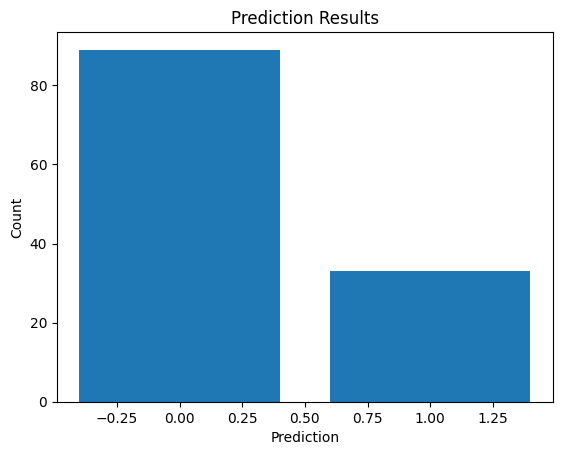

In [54]:
import matplotlib.pyplot as plt

# Convert the prediction result to a Pandas DataFrame for easier plotting
prediction_df = prediction_result.toPandas()

# Count the occurrences of each predicted label
label_counts = prediction_df['prediction'].value_counts()

# Create the bar plot
plt.bar(label_counts.index, label_counts.values)

# Set the labels and title
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Prediction Results')

# Show the plot
plt.show()
